In [5]:
import zipfile
import os

zip_file_path = "C:\\Users\\kalle\\Downloads\\archive.zip"  # Change this
extract_to_path = "extracted_dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction completed!")


Extraction completed!


In [13]:
import os
import cv2

video_folder = "extracted_dataset/FF++"  # Path to FF++ where real and fake videos are stored
frames_folder = "frames_dataset"  # Where extracted frames will be saved

# Ensure output folders exist
os.makedirs(frames_folder, exist_ok=True)
os.makedirs(os.path.join(frames_folder, "real"), exist_ok=True)
os.makedirs(os.path.join(frames_folder, "fake"), exist_ok=True)

# Process both "real" and "fake" videos
for category in ["real", "fake"]:
    category_path = os.path.join(video_folder, category)
    save_path = os.path.join(frames_folder, category)

    print(f"🔍 Searching for {category} videos in '{category_path}'...")

    if not os.path.exists(category_path):
        print(f"❌ Error: Folder '{category_path}' does not exist!")
        continue

    video_files = [f for f in os.listdir(category_path) if f.endswith((".mp4", ".avi", ".mov", ".mkv"))]

    if len(video_files) == 0:
        print(f"❌ No {category} videos found in '{category_path}'. Skipping...")
        continue

    print(f"✅ Found {len(video_files)} {category} videos. Extracting frames...")

    for video_file in video_files:
        video_path = os.path.join(category_path, video_file)
        video_name = os.path.splitext(video_file)[0]  # Get video name without extension

        print(f"📂 Processing video: {video_file}")

        video_output_folder = os.path.join(save_path, video_name)
        os.makedirs(video_output_folder, exist_ok=True)

        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"❌ Error: Cannot open {video_file}. Skipping...")
            continue

        frame_count = 0
        max_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        while frame_count < max_frames:
            ret, frame = cap.read()
            if not ret:
                break  # Stop when no more frames

            if frame_count % 5 == 0:  # Save every 5th frame to reduce dataset size
                frame_filename = os.path.join(video_output_folder, f"frame_{frame_count:04d}.jpg")
                cv2.imwrite(frame_filename, frame)

            frame_count += 1

            if frame_count % 50 == 0:  # Print progress every 50 frames
                print(f"📸 Extracted {frame_count}/{max_frames} frames from {video_file}")

        cap.release()
        print(f"✅ Finished extracting frames from {video_file}.\n")

print("✅ Frame extraction complete! All frames are saved in 'frames_dataset/real' and 'frames_dataset/fake'.")


🔍 Searching for real videos in 'extracted_dataset/FF++\real'...
✅ Found 200 real videos. Extracting frames...
📂 Processing video: 01__exit_phone_room.mp4
📸 Extracted 50/305 frames from 01__exit_phone_room.mp4
📸 Extracted 100/305 frames from 01__exit_phone_room.mp4
📸 Extracted 150/305 frames from 01__exit_phone_room.mp4
📸 Extracted 200/305 frames from 01__exit_phone_room.mp4
📸 Extracted 250/305 frames from 01__exit_phone_room.mp4
📸 Extracted 300/305 frames from 01__exit_phone_room.mp4
✅ Finished extracting frames from 01__exit_phone_room.mp4.

📂 Processing video: 01__hugging_happy.mp4
📸 Extracted 50/787 frames from 01__hugging_happy.mp4
📸 Extracted 100/787 frames from 01__hugging_happy.mp4
📸 Extracted 150/787 frames from 01__hugging_happy.mp4
📸 Extracted 200/787 frames from 01__hugging_happy.mp4
📸 Extracted 250/787 frames from 01__hugging_happy.mp4
📸 Extracted 300/787 frames from 01__hugging_happy.mp4
📸 Extracted 350/787 frames from 01__hugging_happy.mp4
📸 Extracted 400/787 frames from 

KeyboardInterrupt: 

In [21]:
import os

frames_folder = "C:\\Users\\kalle\\frames_dataset\\real"

if os.path.exists(frames_folder):
    total_frames = sum(len(files) for _, _, files in os.walk(frames_folder))
    print(f"✅ {total_frames} real frames extracted so far.")
else:
    print("❌ No frames extracted yet!")



✅ 18469 real frames extracted so far.


In [27]:
import os

real_frames_folder = "C:\\Users\\kalle\\frames_dataset\\real"
fake_videos_folder = "C:\\Users\\kalle\\extracted_dataset\\FF++\\fake"

# Get names of processed real videos
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Check which fake videos exist
matching_fake_videos = [f for f in os.listdir(fake_videos_folder) if os.path.splitext(f)[0] in real_video_names]

print(f"✅ Found {len(matching_fake_videos)} matching fake videos.")
print("🎯 First 10 matching fake videos:", matching_fake_videos[:10])  # Show first 10


✅ Found 0 matching fake videos.
🎯 First 10 matching fake videos: []


In [29]:
import os

real_videos_folder = "extracted_dataset/FF++/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get all video names
real_videos = sorted(os.listdir(real_videos_folder))
fake_videos = sorted(os.listdir(fake_videos_folder))

print(f"✅ Found {len(real_videos)} real videos and {len(fake_videos)} fake videos.")

# Print first 10 video names for comparison
print("\n🎯 First 10 Real Videos:")
print(real_videos[:10])

print("\n🎭 First 10 Fake Videos:")
print(fake_videos[:10])


✅ Found 200 real videos and 200 fake videos.

🎯 First 10 Real Videos:
['01__exit_phone_room.mp4', '01__hugging_happy.mp4', '01__kitchen_pan.mp4', '01__kitchen_still.mp4', '01__meeting_serious.mp4', '01__outside_talking_pan_laughing.mp4', '01__outside_talking_still_laughing.mp4', '01__podium_speech_happy.mp4', '01__secret_conversation.mp4', '01__talking_against_wall.mp4']

🎭 First 10 Fake Videos:
['01_02__outside_talking_still_laughing__YVGY8LOK.mp4', '01_02__walk_down_hall_angry__YVGY8LOK.mp4', '01_03__hugging_happy__ISF9SP4G.mp4', '01_03__podium_speech_happy__480LQD1C.mp4', '01_03__talking_against_wall__JZUXXFRB.mp4', '01_11__meeting_serious__9OM3VE0Y.mp4', '01_11__secret_conversation__4OJNJLOO.mp4', '01_11__talking_against_wall__9229VVZ3.mp4', '01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4', '01_12__outside_talking_pan_laughing__TNI7KUZ6.mp4']


In [31]:
import os

real_videos_folder = "extracted_dataset/FF++/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get all video names
real_videos = sorted(os.listdir(real_videos_folder))
fake_videos = sorted(os.listdir(fake_videos_folder))

# Create a mapping: real → fake
real_to_fake_map = {}

for real_vid in real_videos:
    real_base = real_vid.replace(".mp4", "")  # Remove extension
    for fake_vid in fake_videos:
        if real_base in fake_vid:  # Check if real name is inside fake name
            real_to_fake_map[real_vid] = fake_vid
            break  # Stop searching once matched

# Print first 10 matched pairs
print("\n✅ First 10 matched real → fake video pairs:")
for i, (real_vid, fake_vid) in enumerate(real_to_fake_map.items()):
    print(f"{i+1}. {real_vid}  →  {fake_vid}")
    if i == 9:
        break



✅ First 10 matched real → fake video pairs:
1. 01__exit_phone_room.mp4  →  04_01__exit_phone_room__0XUW13RW.mp4
2. 01__kitchen_still.mp4  →  04_01__kitchen_still__6I623VU9.mp4
3. 01__outside_talking_still_laughing.mp4  →  04_01__outside_talking_still_laughing__0XUW13RW.mp4
4. 01__secret_conversation.mp4  →  02_01__secret_conversation__YVGY8LOK.mp4
5. 01__talking_against_wall.mp4  →  09_01__talking_against_wall__O8HNNX43.mp4
6. 01__walk_down_hall_angry.mp4  →  09_01__walk_down_hall_angry__6TSGVLHA.mp4
7. 01__walking_and_outside_surprised.mp4  →  03_01__walking_and_outside_surprised__JZUXXFRB.mp4
8. 02__outside_talking_still_laughing.mp4  →  01_02__outside_talking_still_laughing__YVGY8LOK.mp4
9. 02__podium_speech_happy.mp4  →  06_02__podium_speech_happy__N8OSN8P6.mp4
10. 02__talking_angry_couch.mp4  →  07_02__talking_angry_couch__1H07DFQJ.mp4


In [33]:
import os
import cv2

video_folder = "extracted_dataset/FF++/fake"  # Path to fake videos
frames_folder = "frames_dataset/fake"  # Where extracted fake frames will be saved

# Ensure output directory exists
os.makedirs(frames_folder, exist_ok=True)

# Get the names of real videos that already have extracted frames
real_frames_folder = "frames_dataset/real"
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Match fake videos that contain the real video name
real_to_fake_map = {}

for real_vid in real_video_names:
    for fake_vid in os.listdir(video_folder):
        if real_vid in fake_vid:  # Check if real video name appears in fake video name
            real_to_fake_map[real_vid] = fake_vid
            break  # Stop searching once matched

print(f"🔍 Found {len(real_to_fake_map)} matching fake videos. Extracting frames...")

for real_vid, fake_vid in real_to_fake_map.items():
    video_name, ext = os.path.splitext(fake_vid)

    print(f"📂 Processing fake video: {fake_vid}")

    video_path = os.path.join(video_folder, fake_vid)
    video_output_folder = os.path.join(frames_folder, video_name)
    os.makedirs(video_output_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Cannot open {fake_vid}. Skipping...")
        continue

    frame_count = 0
    max_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break  

        if frame_count % 5 == 0:  # Save every 5th frame
            frame_filename = os.path.join(video_output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)

        frame_count += 1

        if frame_count % 50 == 0:
            print(f"📸 Extracted {frame_count}/{max_frames} frames from {fake_vid}")

    cap.release()
    print(f"✅ Finished extracting frames from {fake_vid}.\n")

print("✅ Frame extraction complete for all matched fake videos!")


🔍 Found 44 matching fake videos. Extracting frames...
📂 Processing fake video: 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 50/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 100/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 150/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 200/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 250/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 300/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
📸 Extracted 350/382 frames from 04_01__exit_phone_room__0XUW13RW.mp4
✅ Finished extracting frames from 04_01__exit_phone_room__0XUW13RW.mp4.

📂 Processing fake video: 04_01__kitchen_still__6I623VU9.mp4
📸 Extracted 50/840 frames from 04_01__kitchen_still__6I623VU9.mp4
📸 Extracted 100/840 frames from 04_01__kitchen_still__6I623VU9.mp4
📸 Extracted 150/840 frames from 04_01__kitchen_still__6I623VU9.mp4
📸 Extracted 200/840 frames from 04_01__kitchen_still__6I623VU9.mp4
📸 

In [35]:
import os
from difflib import get_close_matches

real_frames_folder = "frames_dataset/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get processed real video names
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Get all fake videos
fake_videos = os.listdir(fake_videos_folder)

# Match real to fake using name similarity
real_to_fake_map = {}

for real_vid in real_video_names:
    best_match = get_close_matches(real_vid, fake_videos, n=1, cutoff=0.4)  # Adjust cutoff if needed
    if best_match:
        real_to_fake_map[real_vid] = best_match[0]

# Print first 10 matched pairs
print(f"✅ Matched {len(real_to_fake_map)} fake videos.")
print("\n🎯 First 10 matched real → fake video pairs:")
for i, (real_vid, fake_vid) in enumerate(real_to_fake_map.items()):
    print(f"{i+1}. {real_vid}  →  {fake_vid}")
    if i == 9:
        break


✅ Matched 114 fake videos.

🎯 First 10 matched real → fake video pairs:
1. 01__exit_phone_room  →  07_21__exit_phone_room__K7KXUHMU.mp4
2. 01__hugging_happy  →  07_15__hugging_happy__9Z2MLKVX.mp4
3. 01__kitchen_pan  →  09_13__kitchen_pan__21H6XSPE.mp4
4. 01__kitchen_still  →  04_18__kitchen_still__NAXINA1N.mp4
5. 01__meeting_serious  →  03_21__meeting_serious__V53E3RVB.mp4
6. 01__outside_talking_pan_laughing  →  09_18__outside_talking_pan_laughing__3VP8836C.mp4
7. 01__outside_talking_still_laughing  →  07_21__outside_talking_still_laughing__K7KXUHMU.mp4
8. 01__podium_speech_happy  →  08_16__podium_speech_happy__8Q7JCS95.mp4
9. 01__secret_conversation  →  04_13__secret_conversation__00T3UYOR.mp4
10. 01__talking_against_wall  →  09_01__talking_against_wall__O8HNNX43.mp4


In [39]:
import os

fake_frames_folder = "frames_dataset/fake"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get already processed fake videos (folders in frames_dataset/fake)
processed_fake_videos = set(os.listdir(fake_frames_folder))

# Find fake videos that are not yet processed
remaining_fake_videos = {fake_vid for fake_vid in real_to_fake_map.values() if fake_vid not in processed_fake_videos}

print(f"✅ Already processed {len(processed_fake_videos)} fake videos.")
print(f"❌ {len(remaining_fake_videos)} fake videos still need frame extraction.")

# Show first 10 missing fake videos
print("\n🎯 First 10 missing fake videos:")
print(list(remaining_fake_videos)[:10])


✅ Already processed 44 fake videos.
❌ 77 fake videos still need frame extraction.

🎯 First 10 missing fake videos:
['09_26__talking_against_wall__C3K20JOL.mp4', '07_21__outside_talking_still_laughing__K7KXUHMU.mp4', '03_27__walk_down_hall_angry__IL675GCI.mp4', '05_08__talking_against_wall__PRBCE28Z.mp4', '06_15__outside_talking_still_laughing__QRCD27P8.mp4', '03_21__secret_conversation__YCSEBZO4.mp4', '03_15__outside_talking_still_laughing__DNUJD8M2.mp4', '07_15__hugging_happy__9Z2MLKVX.mp4', '06_11__walking_outside_cafe_disgusted__MX659QU8.mp4', '07_03__talking_angry_couch__WPT3Z2KN.mp4']


In [41]:
import os

real_frames_folder = "frames_dataset/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get real videos that have extracted frames
real_video_names = set(os.listdir(real_frames_folder))

# Find fake videos that have a matching real video
fake_videos_to_process = [fake_vid for fake_vid in remaining_fake_videos if any(real_vid in fake_vid for real_vid in real_video_names)]

print(f"✅ {len(fake_videos_to_process)} fake videos have matching real videos with extracted frames.")
print(f"❌ {len(remaining_fake_videos) - len(fake_videos_to_process)} fake videos do NOT have a matching real video.")

# Show first 10 matching fake videos
print("\n🎯 First 10 fake videos to process:")
print(fake_videos_to_process[:10])


✅ 19 fake videos have matching real videos with extracted frames.
❌ 58 fake videos do NOT have a matching real video.

🎯 First 10 fake videos to process:
['05_08__talking_against_wall__PRBCE28Z.mp4', '07_03__talking_angry_couch__WPT3Z2KN.mp4', '04_07__kitchen_pan__XRK7FGZX.mp4', '07_06__kitchen_pan__NMGYPBXE.mp4', '06_04__outside_talking_still_laughing__ZK95PQDE.mp4', '03_04__talking_angry_couch__T04P6ELC.mp4', '06_04__walking_outside_cafe_disgusted__ZK95PQDE.mp4', '07_09__outside_talking_still_laughing__N9CWME71.mp4', '09_01__talking_against_wall__O8HNNX43.mp4', '09_07__kitchen_pan__N9CWME71.mp4']


In [43]:
import os
from difflib import get_close_matches

real_frames_folder = "frames_dataset/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get real videos that have extracted frames
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Get remaining fake videos that were not processed
all_fake_videos = os.listdir(fake_videos_folder)

# Find closest matching real video for each fake video
real_to_fake_map = {}

for fake_vid in all_fake_videos:
    fake_base = fake_vid.replace(".mp4", "")  # Remove extension for matching
    best_match = get_close_matches(fake_base, real_video_names, n=1, cutoff=0.4)  # Adjust cutoff if needed
    
    if best_match:
        real_to_fake_map[best_match[0]] = fake_vid

print(f"✅ Matched {len(real_to_fake_map)} fake videos to real videos.")

# Show first 10 matched pairs
print("\n🎯 First 10 matched real → fake video pairs:")
for i, (real_vid, fake_vid) in enumerate(real_to_fake_map.items()):
    print(f"{i+1}. {real_vid}  →  {fake_vid}")
    if i == 9:
        break


✅ Matched 88 fake videos to real videos.

🎯 First 10 matched real → fake video pairs:
1. 02__outside_talking_still_laughing  →  01_20__outside_talking_still_laughing__FW94AIMJ.mp4
2. 02__walk_down_hall_angry  →  09_02__walk_down_hall_angry__6KUOFMZW.mp4
3. 03__hugging_happy  →  01_03__hugging_happy__ISF9SP4G.mp4
4. 03__podium_speech_happy  →  02_13__podium_speech_happy__2YSYT2N3.mp4
5. 03__talking_against_wall  →  03_11__talking_against_wall__P08VGHTA.mp4
6. 01__meeting_serious  →  01_11__meeting_serious__9OM3VE0Y.mp4
7. 01__secret_conversation  →  01_11__secret_conversation__4OJNJLOO.mp4
8. 01__talking_against_wall  →  01_11__talking_against_wall__9229VVZ3.mp4
9. 01__walking_outside_cafe_disgusted  →  01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4
10. 02__outside_talking_pan_laughing  →  01_20__outside_talking_pan_laughing__OTGHOG4Z.mp4


In [45]:
import os
from difflib import get_close_matches

real_frames_folder = "frames_dataset/real"
fake_videos_folder = "extracted_dataset/FF++/fake"

# Get real videos that have extracted frames
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Get the 88 fake videos to process
fake_videos_to_process = list(real_to_fake_map.values())

# Find closest matching real video for each fake video
matched_fake_videos = {}

for fake_vid in fake_videos_to_process:
    fake_base = fake_vid.replace(".mp4", "")  # Remove extension for matching
    best_match = get_close_matches(fake_base, real_video_names, n=1, cutoff=0.4)  # Adjust cutoff if needed
    
    if best_match:
        matched_fake_videos[best_match[0]] = fake_vid

print(f"✅ Matched {len(matched_fake_videos)} fake videos to real videos.")

# Show first 10 matched pairs
print("\n🎯 First 10 matched real → fake video pairs:")
for i, (real_vid, fake_vid) in enumerate(matched_fake_videos.items()):
    print(f"{i+1}. {real_vid}  →  {fake_vid}")
    if i == 9:
        break


✅ Matched 88 fake videos to real videos.

🎯 First 10 matched real → fake video pairs:
1. 02__outside_talking_still_laughing  →  01_20__outside_talking_still_laughing__FW94AIMJ.mp4
2. 02__walk_down_hall_angry  →  09_02__walk_down_hall_angry__6KUOFMZW.mp4
3. 03__hugging_happy  →  01_03__hugging_happy__ISF9SP4G.mp4
4. 03__podium_speech_happy  →  02_13__podium_speech_happy__2YSYT2N3.mp4
5. 03__talking_against_wall  →  03_11__talking_against_wall__P08VGHTA.mp4
6. 01__meeting_serious  →  01_11__meeting_serious__9OM3VE0Y.mp4
7. 01__secret_conversation  →  01_11__secret_conversation__4OJNJLOO.mp4
8. 01__talking_against_wall  →  01_11__talking_against_wall__9229VVZ3.mp4
9. 01__walking_outside_cafe_disgusted  →  01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4
10. 02__outside_talking_pan_laughing  →  01_20__outside_talking_pan_laughing__OTGHOG4Z.mp4


In [47]:
import os
from difflib import get_close_matches

real_frames_folder = "frames_dataset/real"
fake_videos_folder = "extracted_dataset/FF++/fake"
fake_frames_folder = "frames_dataset/fake"

# Get real videos that have extracted frames
real_video_names = [f for f in os.listdir(real_frames_folder) if os.path.isdir(os.path.join(real_frames_folder, f))]

# Get already processed fake videos (folders in frames_dataset/fake)
processed_fake_videos = set(os.listdir(fake_frames_folder))

# Get the 88 fake videos to process
fake_videos_to_process = list(real_to_fake_map.values())

# Find closest matching real video for each fake video
unprocessed_fake_videos = {}

for fake_vid in fake_videos_to_process:
    fake_base = fake_vid.replace(".mp4", "")  # Remove extension for matching
    best_match = get_close_matches(fake_base, real_video_names, n=1, cutoff=0.4)  # Adjust cutoff if needed

    if best_match and fake_vid not in processed_fake_videos:
        unprocessed_fake_videos[best_match[0]] = fake_vid

print(f"✅ Already processed {len(processed_fake_videos)} fake videos.")
print(f"❌ {len(unprocessed_fake_videos)} fake videos still need frame extraction.")

# Show first 10 missing fake videos
print("\n🎯 First 10 fake videos to process:")
print(list(unprocessed_fake_videos.values())[:10])


✅ Already processed 44 fake videos.
❌ 88 fake videos still need frame extraction.

🎯 First 10 fake videos to process:
['01_20__outside_talking_still_laughing__FW94AIMJ.mp4', '09_02__walk_down_hall_angry__6KUOFMZW.mp4', '01_03__hugging_happy__ISF9SP4G.mp4', '02_13__podium_speech_happy__2YSYT2N3.mp4', '03_11__talking_against_wall__P08VGHTA.mp4', '01_11__meeting_serious__9OM3VE0Y.mp4', '01_11__secret_conversation__4OJNJLOO.mp4', '01_11__talking_against_wall__9229VVZ3.mp4', '01_11__walking_outside_cafe_disgusted__FAFWDR4W.mp4', '01_20__outside_talking_pan_laughing__OTGHOG4Z.mp4']


In [49]:
import cv2
import os

video_folder = "extracted_dataset/FF++/fake"
frames_folder = "frames_dataset/fake"

# Ensure output directory exists
os.makedirs(frames_folder, exist_ok=True)

print(f"🔍 Extracting frames from {len(unprocessed_fake_videos)} missing fake videos...")

for fake_vid in unprocessed_fake_videos.values():
    video_name, ext = os.path.splitext(fake_vid)

    print(f"📂 Processing fake video: {fake_vid}")

    video_path = os.path.join(video_folder, fake_vid)
    video_output_folder = os.path.join(frames_folder, video_name)
    os.makedirs(video_output_folder, exist_ok=True)

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"❌ Error: Cannot open {fake_vid}. Skipping...")
        continue

    frame_count = 0
    max_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    while frame_count < max_frames:
        ret, frame = cap.read()
        if not ret:
            break  

        if frame_count % 5 == 0:  # Save every 5th frame
            frame_filename = os.path.join(video_output_folder, f"frame_{frame_count:04d}.jpg")
            cv2.imwrite(frame_filename, frame)

        frame_count += 1

        if frame_count % 50 == 0:
            print(f"📸 Extracted {frame_count}/{max_frames} frames from {fake_vid}")

    cap.release()
    print(f"✅ Finished extracting frames from {fake_vid}.\n")

print("✅ Frame extraction complete for all missing fake videos!")


🔍 Extracting frames from 88 missing fake videos...
📂 Processing fake video: 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 50/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 100/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 150/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 200/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 250/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 300/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 350/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 400/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 450/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 500/727 frames from 01_20__outside_talking_still_laughing__FW94AIMJ.mp4
📸 Extracted 550/727 frames from 0

In [51]:
import os
import shutil

frames_dataset = "frames_dataset"
processed_dataset = "processed_dataset"

# Define paths for structured dataset
train_path = os.path.join(processed_dataset, "train")
val_path = os.path.join(processed_dataset, "val")
test_path = os.path.join(processed_dataset, "test")

# Ensure all folders exist
for split in [train_path, val_path, test_path]:
    os.makedirs(os.path.join(split, "real"), exist_ok=True)
    os.makedirs(os.path.join(split, "fake"), exist_ok=True)

# Get real and fake image paths
real_images = [os.path.join(frames_dataset, "real", vid, img) 
               for vid in os.listdir(os.path.join(frames_dataset, "real")) 
               for img in os.listdir(os.path.join(frames_dataset, "real", vid)) if img.endswith(".jpg")]

fake_images = [os.path.join(frames_dataset, "fake", vid, img) 
               for vid in os.listdir(os.path.join(frames_dataset, "fake")) 
               for img in os.listdir(os.path.join(frames_dataset, "fake", vid)) if img.endswith(".jpg")]

print(f"✅ Found {len(real_images)} real images and {len(fake_images)} fake images.")

# Shuffle and split dataset (80% train, 10% val, 10% test)
import random
random.shuffle(real_images)
random.shuffle(fake_images)

def split_and_move(images, label):
    train_split = int(0.8 * len(images))
    val_split = int(0.9 * len(images))

    for i, img_path in enumerate(images):
        filename = os.path.basename(img_path)
        if i < train_split:
            dest = os.path.join(train_path, label, filename)
        elif i < val_split:
            dest = os.path.join(val_path, label, filename)
        else:
            dest = os.path.join(test_path, label, filename)
        
        shutil.copy(img_path, dest)

split_and_move(real_images, "real")
split_and_move(fake_images, "fake")

print("✅ Dataset organized into train, validation, and test sets.")


✅ Found 18469 real images and 17314 fake images.


PermissionError: [Errno 13] Permission denied: 'processed_dataset\\test\\real\\frame_0015.jpg'

In [ ]:
import tensorflow as tf

# Define paths
dataset_path = "processed_dataset"  # The folder with "train", "val", "test"

# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Load dataset with train/val split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "train"),
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "val"),
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "test"),
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Data preprocessing complete!")


In [54]:
import os

train_fake = os.listdir("processed_dataset/train/fake")
val_fake = os.listdir("processed_dataset/val/fake")
test_fake = os.listdir("processed_dataset/test/fake")

print(f"✅ Train Fake Images: {len(train_fake)}")
print(f"✅ Val Fake Images: {len(val_fake)}")
print(f"✅ Test Fake Images: {len(test_fake)}")


✅ Train Fake Images: 0
✅ Val Fake Images: 0
✅ Test Fake Images: 0


In [56]:
import os
import shutil
import random

frames_dataset = "frames_dataset/fake"
processed_dataset = "processed_dataset"

# Define paths for structured dataset
train_path = os.path.join(processed_dataset, "train/fake")
val_path = os.path.join(processed_dataset, "val/fake")
test_path = os.path.join(processed_dataset, "test/fake")

# Ensure fake folders exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Get all fake images
fake_images = [os.path.join(frames_dataset, vid, img) 
               for vid in os.listdir(frames_dataset) 
               for img in os.listdir(os.path.join(frames_dataset, vid)) if img.endswith(".jpg")]

print(f"✅ Found {len(fake_images)} fake images.")

# Shuffle and split dataset (80% train, 10% val, 10% test)
random.shuffle(fake_images)

train_split = int(0.8 * len(fake_images))
val_split = int(0.9 * len(fake_images))

for i, img_path in enumerate(fake_images):
    filename = os.path.basename(img_path)
    if i < train_split:
        dest = os.path.join(train_path, filename)
    elif i < val_split:
        dest = os.path.join(val_path, filename)
    else:
        dest = os.path.join(test_path, filename)
    
    shutil.copy(img_path, dest)

print("✅ Fake dataset successfully restructured into train, validation, and test sets.")


✅ Found 17314 fake images.


OSError: [Errno 22] Invalid argument: 'processed_dataset\\test/fake\\frame_0090.jpg'

In [1]:
import os

train_fake = os.listdir("processed_dataset/train/fake")
val_fake = os.listdir("processed_dataset/val/fake")
test_fake = os.listdir("processed_dataset/test/fake")

print(f"✅ Train Fake Images: {len(train_fake)}")
print(f"✅ Val Fake Images: {len(val_fake)}")
print(f"✅ Test Fake Images: {len(test_fake)}")


✅ Train Fake Images: 314
✅ Val Fake Images: 298
✅ Test Fake Images: 295


In [3]:
import tensorflow as tf
import os

# Define dataset path
dataset_path = "processed_dataset"

# Image size and batch size
img_size = (224, 224)
batch_size = 32

# Load dataset with train/val split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "train"),
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "val"),
    image_size=img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, "test"),
    image_size=img_size,
    batch_size=batch_size
)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Data loading and preprocessing complete!")


Found 638 files belonging to 2 classes.
Found 601 files belonging to 2 classes.
Found 582 files belonging to 2 classes.
✅ Data loading and preprocessing complete!


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer (Binary: Real vs Fake)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # Adjust epochs if needed
)

# Save the model
model.save("deepfake_detector.h5")

print("✅ Model training complete & saved as 'deepfake_detector.h5'!")


Epoch 1/10


C:\Users\kalle\anaconda3new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5008 - loss: 1.0871 - val_accuracy: 0.5491 - val_loss: 0.6869
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5535 - loss: 0.6827 - val_accuracy: 0.5358 - val_loss: 0.6602
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5896 - loss: 0.6450 - val_accuracy: 0.6007 - val_loss: 0.6437
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6788 - loss: 0.5774 - val_accuracy: 0.5957 - val_loss: 0.6459
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.6911 - loss: 0.5573 - val_accuracy: 0.6156 - val_loss: 0.6287
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7308 - loss: 0.5120 - val_accuracy: 0.6389 - val_loss: 0.7655
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7332 - loss: 0.4989 - val_accuracy: 0.6156 - val_loss: 0.7532
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7553 - loss: 0.4369 - val_accuracy: 0.6290 - val_loss: 0.7046
Epo

✅ Model training complete & saved as 'deepfake_detector.h5'!


In [13]:
# Load the trained model
model = tf.keras.models.load_model("deepfake_detector.h5")

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.6119 - loss: 0.8912
✅ Test Accuracy: 0.5928
✅ Test Loss: 0.9057


In [15]:
# Load the trained model
model = tf.keras.models.load_model("deepfake_detector.h5")

# Evaluate on test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.6090 - loss: 0.8417
✅ Test Accuracy: 0.5928
✅ Test Loss: 0.9057


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
❌ The image is FAKE.


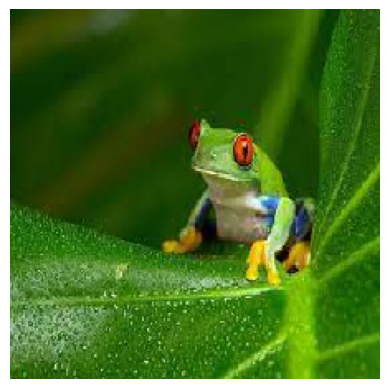

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model("deepfake_detector.h5")

# Recompile the model (if you intend to use evaluation or metrics)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Function to load and preprocess the image
def prepare_image(img_path):
    # Load the image with the target size that the model expects (e.g., 224x224)
    img = image.load_img(img_path, target_size=(224, 224))  # adjust size based on your model
    # Convert image to array
    img_array = image.img_to_array(img)
    # Normalize the image if required (e.g., dividing by 255 if the model was trained on normalized data)
    img_array = img_array / 255.0
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Manually input the image path (update to your specific image path)
img_path = r"C:\Users\kalle\OneDrive\Pictures\REAL.jpg"  # Replace with your image file

# Prepare the image
prepared_image = prepare_image(img_path)

# Get the model's prediction (0 for real, 1 for fake)
prediction = model.predict(prepared_image)

# Check prediction and print the result
if prediction[0] > 0.5:
    print("❌ The image is FAKE.")
else:
    print("✅ The image is REAL.")

# Display the image
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()


In [95]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the pre-trained ResNet50 model (without the top layers)
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces the feature map to a 1D vector
x = Dense(1024, activation='relu')(x)  # Fully connected layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification (real/fake)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers to avoid updating them in the first training phase
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with an Adam optimizer and binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up data generators with data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocess images for ResNet50
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # Only apply preprocessing on validation data

# Assuming you have 'train_dir' and 'val_dir' as paths to your train and validation directories
train_data = train_datagen.flow_from_directory(
    'C:\\Users\\kalle\\processed_dataset\\train',  # Replace with your train data directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    'C:\\Users\\kalle\\processed_dataset\\val',  # Replace with your validation data directory
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary'
)

# Train the model
model.fit(train_data, validation_data=val_data, epochs=10)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step
Found 632 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


C:\Users\kalle\anaconda3new\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.4944 - loss: 0.8022 - val_accuracy: 0.5681 - val_loss: 0.7269
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6103 - loss: 0.6539 - val_accuracy: 0.5467 - val_loss: 0.7659
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6206 - loss: 0.6630 - val_accuracy: 0.5584 - val_loss: 0.7165
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.6411 - loss: 0.6277 - val_accuracy: 0.5739 - val_loss: 0.7190
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7168 - loss: 0.5549 - val_accuracy: 0.5603 - val_loss: 0.7397
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.6609 - loss: 0.5880 - val_accuracy: 0.5545 - val_loss: 0.7007
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.6942 - loss: 0.5677 - val_accuracy: 0.5817 - val_loss: 0.7179
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.6703 - loss: 0.6019 - val_accuracy: 0.5992 - val_loss

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ✅ Load EfficientNetB3 with pre-trained weights (No top layer)
base_model = EfficientNetB3(weights='imagenet', include_top=False)

# ✅ Custom layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)  # Increased neurons for better feature learning
x = Dropout(0.4)(x)  # ✅ Prevents overfitting
predictions = Dense(1, activation='sigmoid')(x)

# ✅ Define model
model = Model(inputs=base_model.input, outputs=predictions)

# ✅ Train only last 30 layers (Prevents overfitting)
for layer in base_model.layers[:-30]:  
    layer.trainable = False

# ✅ Compile model (More stable learning rate)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Optimized Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# ✅ Load dataset (224x224 for balance between speed & accuracy)
train_data = train_datagen.flow_from_directory(
    'C:\\Users\\kalle\\processed_dataset\\train',
    target_size=(224, 224),  
    batch_size=16,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    'C:\\Users\\kalle\\processed_dataset\\val',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

# ✅ Early Stopping & Reduce LR
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# ✅ Train the model (20 epochs should reach 75%+)
model.fit(train_data, validation_data=val_data, epochs=20, callbacks=[early_stop, reduce_lr])  

# ✅ Save the best model
model.save("deepfake_detector_v2.h5")


Found 638 images belonging to 2 classes.
Found 601 images belonging to 2 classes.


C:\Users\kalle\anaconda3new\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.5183 - loss: 0.7049 - val_accuracy: 0.5557 - val_loss: 0.6694 - learning_rate: 1.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6113 - loss: 0.6493 - val_accuracy: 0.6057 - val_loss: 0.6655 - learning_rate: 1.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.6845 - loss: 0.6051 - val_accuracy: 0.5973 - val_loss: 0.6452 - learning_rate: 1.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.5997 - loss: 0.6279 - val_accuracy: 0.6057 - val_loss: 0.6527 - learning_rate: 1.0000e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6668 - loss: 0.5762
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
40/40 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.6671 - loss: 0.5764 - val_accuracy: 0.6073 - val_loss: 0.6457 - learning_rate: 1.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.6405 - loss:

In [22]:
from tensorflow.keras.models import load_model

# ✅ Load the saved model
model = load_model("deepfake_detector_v2.h5")

# ✅ Unfreeze more layers for fine-tuning (if needed)
for layer in model.layers[:-100]:  
    layer.trainable = True  

# ✅ Compile with a lower learning rate
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Continue training for remaining epochs
model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stop, reduce_lr])  

# ✅ Save the final model
model.save("deepfake_detector_final.h5")


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 628s 10s/step - accuracy: 0.6200 - loss: 0.6409 - val_accuracy: 0.6223 - val_loss: 0.6310 - learning_rate: 1.0000e-05
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 333s 8s/step - accuracy: 0.6391 - loss: 0.6214 - val_accuracy: 0.6439 - val_loss: 0.6293 - learning_rate: 1.0000e-05
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 316s 8s/step - accuracy: 0.5877 - loss: 0.6397 - val_accuracy: 0.6356 - val_loss: 0.6278 - learning_rate: 1.0000e-05
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.6619 - loss: 0.6094 - val_accuracy: 0.6339 - val_loss: 0.6257 - learning_rate: 1.0000e-05
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 321s 8s/step - accuracy: 0.6584 - loss: 0.6192 - val_accuracy: 0.6473 - val_loss: 0.6240 - learning_rate: 1.0000e-05
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 325s 8s/step - accuracy: 0.6415 - loss: 0.6353 - val_accuracy: 0.6473 - val_loss: 0.6215 - learning_rate: 1.0000e-05
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 305s 8s/step - accuracy: 0.6470

TypeError: cannot pickle 'module' object

In [ ]:
from tensorflow.keras.optimizers import Adam

# ✅ Recompile the model (since loading may remove optimizer settings)
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Evaluate the model again
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4%}")


In [25]:
model.save("deepfake_detector_final.keras")


In [27]:
model.summary()


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_3 (Rescaling)       │ (None, None, None, 3)     │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, None, None, 3)     │               7 │ rescaling_3[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_4 (Rescaling)       │ (None, None, None, 3)     │               0 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, None, None, 3)     │               0 │ rescaling_4[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, None, None, 40)    │           1,080 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, None, None, 40)    │             160 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, None, None, 40)    │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, None, None, 40)    │             360 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, None, None, 40)    │             160 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, None, None, 40)    │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 40)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 40)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 10)          │             410 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 40)          │             44

 Total params: 26,448,532 (100.89 MB)

 Trainable params: 7,438,769 (28.38 MB)

 Non-trainable params: 4,132,223 (15.76 MB)

 Optimizer params: 14,877,540 (56.75 MB)

In [29]:
from tensorflow import keras

model = keras.models.load_model("deepfake_detector_final.keras")


In [31]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4%}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6336 - loss: 0.6272
Validation Loss: 0.6165, Validation Accuracy: 65.3910%


In [41]:
from tensorflow import keras

try:
    model = keras.models.load_model("deepfake_detector_final.keras")
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")


✅ Model loaded successfully!


In [42]:
print("H")

H
